# LOVE IS ALL YOU COUNT
##### - by Amanda Seagle and Lorenza Culotta - 

# 1.1. LastFM API calls to get top love songs

In [1]:
#Dependencies
import pandas as pd
import requests
import json
from pprint import pprint
from config import lastfm_api

In [45]:
#Set the parameters to LastFM API calls. Method and Limit are empty so we can adjust them to specific calls\
#like get_top_tracks or track.getInfo

params={
    "tag": "love",
    "api_key": lastfm_api,
    "format": "json",
    "method":"tag.gettoptracks",
    "limit": 2000
}

base_url= "http://ws.audioscrobbler.com/2.0/?"
example_url= "/2.0/?method=tag.gettoptracks&tag=disco&api_key=YOUR_API_KEY&format=json"    #taken from website

#API call for first 1000 songs using tag.getTopTracks
# params["page"]=1

response=requests.get(base_url, params=params).json()
# pprint(response)

results_df=pd.DataFrame(response["tracks"]["track"])
results_df.head()

,name,duration,mbid,url,streamable,artist,image,@attr
0,Wonderwall,259,31623cce-9717-4513-9d83-1b5d04e44f9b,https://www.last.fm/music/Oasis/_/Wonderwall,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Oasis', 'mbid': 'ecf9f3a3-35e9-4c58-...",[{'#text': 'https://lastfm.freetls.fastly.net/...,{'rank': '1'}
1,The Scientist,309,13f5488d-8e41-42d8-9fe9-a5295f1a9a3d,https://www.last.fm/music/Coldplay/_/The+Scien...,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Coldplay', 'mbid': 'cc197bad-dc9c-44...",[{'#text': 'https://lastfm.freetls.fastly.net/...,{'rank': '2'}
2,Yellow,267,8b5bf478-22f8-4902-a1c1-0db82261db58,https://www.last.fm/music/Coldplay/_/Yellow,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Coldplay', 'mbid': 'cc197bad-dc9c-44...",[{'#text': 'https://lastfm.freetls.fastly.net/...,{'rank': '3'}
3,Fix You,294,3af0af54-9c93-4578-9128-d04054286ba3,https://www.last.fm/music/Coldplay/_/Fix+You,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Coldplay', 'mbid': 'cc197bad-dc9c-44...",[{'#text': 'https://lastfm.freetls.fastly.net/...,{'rank': '4'}
4,Chasing Cars,0,f62a3798-6559-4f9b-8b80-6ea3e4ad89aa,https://www.last.fm/music/Snow+Patrol/_/Chasin...,"{'#text': '0', 'fulltrack': '0'}","{'name': 'Snow Patrol', 'mbid': 'a66999a7-ae5c...",[{'#text': 'https://lastfm.freetls.fastly.net/...,{'rank': '5'}


In [2]:
#Create Top Love Songs DataFrame to populate with info retrieved from LastFM
top2000_lovesongs_df=pd.DataFrame({
    "Rank": [],
    "Song Name": [],
    "Artist": [],
    "Album": []
})


In [34]:
#The 2000 songs are in a list under "response["tracks"]["track"]"
results=response["tracks"]["track"]

for index, row in results_df.iterrows():
    song= results[index]["name"]     
    artist= results[index]["artist"]["name"]
    print(f'Info retrieved for index: {index}')
    
    #Retrieve info about date release of album and track duration
    try:
        song_url=f'http://ws.audioscrobbler.com/2.0/?method=track.getInfo&api_key={lastfm_api}\
                    &track={song}&artist={artist}&format=json'
        song_response=requests.get(song_url).json()
        print(f'-->Retrieving album name for {song} by {artist}')
        album=song_response["track"]["album"]["title"]

    except (KeyError, IndexError, ValueError):
        print(f'----Missing field/result for {album} by {artist}. Skipping----')
    
    #Populate df
    try:
        top2000_lovesongs_df.loc[index, "Rank"]=results[index]["@attr"]["rank"]
        top2000_lovesongs_df.loc[index, "Song Name"]=results[index]["name"]
        top2000_lovesongs_df.loc[index, "Artist"]=results[index]["artist"]["name"]
        top2000_lovesongs_df.loc[index, "Album"]=song_response["track"]["album"]["title"]
            
    except (KeyError, IndexError):
        print(f'----Missing field/result for {song} by {artist}. Skipping----')


Info retrieved for index: 0
-->Retrieving album name for Wonderwall by Oasis
Info retrieved for index: 1
-->Retrieving album name for The Scientist by Coldplay
Info retrieved for index: 2
-->Retrieving album name for Yellow by Coldplay
Info retrieved for index: 3
-->Retrieving album name for Fix You by Coldplay
Info retrieved for index: 4
-->Retrieving album name for Chasing Cars by Snow Patrol
Info retrieved for index: 5
-->Retrieving album name for Iris by Goo Goo Dolls
Info retrieved for index: 6
-->Retrieving album name for I'm Yours by Jason Mraz
Info retrieved for index: 7
-->Retrieving album name for I Will Follow You Into The Dark by Death Cab for Cutie
Info retrieved for index: 8
-->Retrieving album name for How to Save a Life by The Fray
Info retrieved for index: 9
-->Retrieving album name for Love Will Tear Us Apart by Joy Division
Info retrieved for index: 10
-->Retrieving album name for She Will Be Loved by Maroon 5
Info retrieved for index: 11
-->Retrieving album name for

-->Retrieving album name for Love Story by Taylor Swift
Info retrieved for index: 90
-->Retrieving album name for Where Is the Love by Black Eyed Peas
Info retrieved for index: 91
-->Retrieving album name for Bubbly by Colbie Caillat
Info retrieved for index: 92
-->Retrieving album name for Breakeven by The Script
Info retrieved for index: 93
-->Retrieving album name for Pictures of You by The Cure
Info retrieved for index: 94
-->Retrieving album name for A Message by Coldplay
Info retrieved for index: 95
-->Retrieving album name for My Girl by The Temptations
Info retrieved for index: 96
-->Retrieving album name for Thank You by Dido
Info retrieved for index: 97
-->Retrieving album name for In the Aeroplane Over the Sea by Neutral Milk Hotel
Info retrieved for index: 98
-->Retrieving album name for Let Me Love You by Mario
Info retrieved for index: 99
-->Retrieving album name for Stand By Me by Ben E. King
Info retrieved for index: 100
-->Retrieving album name for Apologize by OneRepu

-->Retrieving album name for All of Me by John Legend
Info retrieved for index: 172
-->Retrieving album name for Creature Fear by Bon Iver
Info retrieved for index: 173
-->Retrieving album name for Do You Realize?? by The Flaming Lips
Info retrieved for index: 174
-->Retrieving album name for Dilemma by Nelly
Info retrieved for index: 175
-->Retrieving album name for Radio by Lana Del Rey
Info retrieved for index: 176
-->Retrieving album name for Don't You Remember by Adele
Info retrieved for index: 177
-->Retrieving album name for We Will Become Silhouettes by The Postal Service
Info retrieved for index: 178
-->Retrieving album name for Fields of Gold by Sting
Info retrieved for index: 179
-->Retrieving album name for Brothers on a Hotel Bed by Death Cab for Cutie
Info retrieved for index: 180
-->Retrieving album name for Dakota by Stereophonics
Info retrieved for index: 181
-->Retrieving album name for Fade Into You by Mazzy Star
Info retrieved for index: 182
-->Retrieving album name

-->Retrieving album name for Heaven by Bryan Adams
Info retrieved for index: 266
-->Retrieving album name for Te Amo by Rihanna
Info retrieved for index: 267
-->Retrieving album name for I Want You by Bob Dylan
Info retrieved for index: 268
-->Retrieving album name for Hold On, We're Going Home by Drake
Info retrieved for index: 269
-->Retrieving album name for Walking After You by Foo Fighters
Info retrieved for index: 270
-->Retrieving album name for Love Today by Mika
Info retrieved for index: 271
-->Retrieving album name for Look What You've Done by Jet
Info retrieved for index: 272
-->Retrieving album name for So Sorry by Feist
Info retrieved for index: 273
-->Retrieving album name for Build God, Then We'll Talk by Panic! at the Disco
Info retrieved for index: 274
-->Retrieving album name for Marry You by Bruno Mars
Info retrieved for index: 275
-->Retrieving album name for Angeles by Elliott Smith
Info retrieved for index: 276
-->Retrieving album name for We Might as Well Be Stra

-->Retrieving album name for Because of You by Ne-Yo
Info retrieved for index: 356
-->Retrieving album name for Love You To by The Beatles
Info retrieved for index: 357
-->Retrieving album name for Everything by Michael Bublé
Info retrieved for index: 358
-->Retrieving album name for Listen to Your Heart by Roxette
Info retrieved for index: 359
-->Retrieving album name for My Body by Young the Giant
Info retrieved for index: 360
-->Retrieving album name for Ordinary People by John Legend
Info retrieved for index: 361
-->Retrieving album name for Happy Ending by Mika
Info retrieved for index: 362
-->Retrieving album name for Love Love Love by Of Monsters and Men
Info retrieved for index: 363
-->Retrieving album name for Wonderwall by Ryan Adams
Info retrieved for index: 364
-->Retrieving album name for Toothpaste Kisses by The Maccabees
Info retrieved for index: 365
-->Retrieving album name for Trouble by Ray LaMontagne
Info retrieved for index: 366
-->Retrieving album name for Is This 

-->Retrieving album name for Amie by Damien Rice
Info retrieved for index: 443
-->Retrieving album name for Always Be My Baby by Mariah Carey
Info retrieved for index: 444
-->Retrieving album name for Love Me Harder by Ariana Grande
Info retrieved for index: 445
-->Retrieving album name for Bed by J. Holiday
Info retrieved for index: 446
-->Retrieving album name for Kim & Jessie by M83
----Missing field/result for Back Of My Lac' by M83. Skipping----
----Missing field/result for Kim & Jessie by M83. Skipping----
Info retrieved for index: 447
-->Retrieving album name for Sweetest Thing by U2
Info retrieved for index: 448
-->Retrieving album name for Can't Fight This Feeling by REO Speedwagon
Info retrieved for index: 449
-->Retrieving album name for All I Want Is You by Barry Louis Polisar
Info retrieved for index: 450
-->Retrieving album name for As Long as You Love Me by Backstreet Boys
Info retrieved for index: 451
-->Retrieving album name for Please, Please, Please, Let Me Get What 

-->Retrieving album name for Breathe (2 AM) by Anna Nalick
Info retrieved for index: 528
-->Retrieving album name for Addicted to You by Avicii
Info retrieved for index: 529
-->Retrieving album name for Pieces of Me by Ashlee Simpson
Info retrieved for index: 530
-->Retrieving album name for You Are the Sunshine of My Life by Stevie Wonder
Info retrieved for index: 531
-->Retrieving album name for Promise by Ciara
Info retrieved for index: 532
-->Retrieving album name for Mint Car by The Cure
Info retrieved for index: 533
-->Retrieving album name for Slow It Down by The Lumineers
Info retrieved for index: 534
-->Retrieving album name for I Just Can't Stop Loving You by Michael Jackson
Info retrieved for index: 535
-->Retrieving album name for Sunshine by Keane
Info retrieved for index: 536
-->Retrieving album name for Open Arms by Journey
Info retrieved for index: 537
-->Retrieving album name for One Time by Justin Bieber
Info retrieved for index: 538
-->Retrieving album name for Big G

-->Retrieving album name for Never Let This Go by Paramore
Info retrieved for index: 613
-->Retrieving album name for United States of Eurasia (+Collateral Damage) by Muse
----Missing field/result for All We Know Is Falling by Muse. Skipping----
----Missing field/result for United States of Eurasia (+Collateral Damage) by Muse. Skipping----
Info retrieved for index: 614
-->Retrieving album name for What Katie Did by The Libertines
Info retrieved for index: 615
-->Retrieving album name for For the Widows in Paradise, for the Fatherless in Ypsilanti by Sufjan Stevens
Info retrieved for index: 616
-->Retrieving album name for Love Is a Laserquest by Arctic Monkeys
Info retrieved for index: 617
-->Retrieving album name for Nothin' on You (feat. Bruno Mars) by B.o.B
Info retrieved for index: 618
-->Retrieving album name for It Will Rain by Bruno Mars
Info retrieved for index: 619
-->Retrieving album name for Firestone by Kygo
Info retrieved for index: 620
-->Retrieving album name for Angel 

-->Retrieving album name for Blue and Yellow by The Used
Info retrieved for index: 698
-->Retrieving album name for Crazy Love by Van Morrison
Info retrieved for index: 699
-->Retrieving album name for Saturday by Fall Out Boy
Info retrieved for index: 700
-->Retrieving album name for Nothing Lasts Forever by Maroon 5
Info retrieved for index: 701
-->Retrieving album name for All alright by Sigur Rós
Info retrieved for index: 702
-->Retrieving album name for Yes I'm Changing by Tame Impala
Info retrieved for index: 703
-->Retrieving album name for Sacrifice by Elton John
Info retrieved for index: 704
-->Retrieving album name for New Person, Same Old Mistakes by Tame Impala
Info retrieved for index: 705
-->Retrieving album name for She's the One by Robbie Williams
Info retrieved for index: 706
-->Retrieving album name for Somewhere a Clock Is Ticking by Snow Patrol
Info retrieved for index: 707
-->Retrieving album name for Hounds of Love by Kate Bush
Info retrieved for index: 708
-->Ret

-->Retrieving album name for Chinese by Lily Allen
Info retrieved for index: 784
-->Retrieving album name for Modern Romance by Yeah Yeah Yeahs
Info retrieved for index: 785
-->Retrieving album name for I'm the Man Who Loves You by Wilco
Info retrieved for index: 786
-->Retrieving album name for Killing For Love by José González
----Missing field/result for Yankee Hotel Foxtrot by José González. Skipping----
----Missing field/result for Killing For Love by José González. Skipping----
Info retrieved for index: 787
-->Retrieving album name for Hear Me Out by Frou Frou
Info retrieved for index: 788
-->Retrieving album name for Lived in Bars by Cat Power
Info retrieved for index: 789
-->Retrieving album name for She Is Love by Parachute
Info retrieved for index: 790
-->Retrieving album name for A Beautiful Mess by Jason Mraz
Info retrieved for index: 791
-->Retrieving album name for Walk Away by Ben Harper
Info retrieved for index: 792
-->Retrieving album name for Northern Downpour by Pani

-->Retrieving album name for If It Kills Me by Jason Mraz
Info retrieved for index: 871
-->Retrieving album name for Empty Apartment by Yellowcard
Info retrieved for index: 872
-->Retrieving album name for I'm Your Man by Leonard Cohen
Info retrieved for index: 873
-->Retrieving album name for The Way You Like It by Adema
Info retrieved for index: 874
-->Retrieving album name for Cupid by Sam Cooke
Info retrieved for index: 875
-->Retrieving album name for Red by Taylor Swift
Info retrieved for index: 876
-->Retrieving album name for Dry Your Eyes by The Streets
Info retrieved for index: 877
-->Retrieving album name for Say by John Mayer
Info retrieved for index: 878
-->Retrieving album name for Oblivion by Bastille
Info retrieved for index: 879
-->Retrieving album name for Bowl of Oranges by Bright Eyes
Info retrieved for index: 880
-->Retrieving album name for Adore You by Miley Cyrus
Info retrieved for index: 881
-->Retrieving album name for The Power of Love by Frankie Goes to Holl

Info retrieved for index: 956
-->Retrieving album name for Lucky You by The National
Info retrieved for index: 957
-->Retrieving album name for Think I'm In Love by Beck
Info retrieved for index: 958
-->Retrieving album name for If Not for You by Bob Dylan
Info retrieved for index: 959
-->Retrieving album name for It's Good To Be In Love by Frou Frou
Info retrieved for index: 960
-->Retrieving album name for King of Anything by Sara Bareilles
Info retrieved for index: 961
-->Retrieving album name for Parachute by Cheryl Cole
Info retrieved for index: 962
-->Retrieving album name for Tout Doucement by Feist
Info retrieved for index: 963
-->Retrieving album name for Emotion by Destiny's Child
Info retrieved for index: 964
-->Retrieving album name for Sometime Around Midnight by The Airborne Toxic Event
Info retrieved for index: 965
-->Retrieving album name for You're Not Alone by Saosin
Info retrieved for index: 966
-->Retrieving album name for Be Be Your Love by Rachael Yamagata
Info re

In [42]:
#Display dataframe and save as csv to avoid re-running the kernel with API calls
top2000_lovesongs_df.to_csv("Results/csv/top2000_lovesongs_df.csv")
top2000_lovesongs_df.head()

,Rank,Song Name,Artist,Album
0,1,Wonderwall,Oasis,(What's the Story) Morning Glory?
1,2,The Scientist,Coldplay,A Rush of Blood to the Head
2,3,Yellow,Coldplay,Parachutes
3,4,Fix You,Coldplay,X&Y
4,5,Chasing Cars,Snow Patrol,Eyes Open


In [41]:
# #Check if all rows of the df have been populated
# #NOTE: some albums are missing?
# top2000_lovesongs_df.count()  

# 1.2. Retrieve release date and lyrics from Genius
* Find instructions here https://github.com/johnwmillr/LyricsGenius/blob/master/README.md

In [43]:
# #Install lyrics genius module
# !pip install lyricsgenius

In [46]:
#Import lyricsgenius module and config with token
import lyricsgenius
from config import genius_token
genius = lyricsgenius.Genius(genius_token)

In [56]:
#Open top_love_songs csv file
top2000_lovesongs_df=pd.read_csv("Results/csv/top2000_lovesongs_df.csv")

#add new columns to populate with year and lyrics
top2000_lovesongs_df["Year"]=""
top2000_lovesongs_df["Lyrics"]=""

#drop weird unnamed column
top2000_lovesongs_df=top2000_lovesongs_df.drop(columns="Unnamed: 0")
top2000_lovesongs_df.head()

,Rank,Song Name,Artist,Album,Year,Lyrics
0,1,Wonderwall,Oasis,(What's the Story) Morning Glory?,,
1,2,The Scientist,Coldplay,A Rush of Blood to the Head,,
2,3,Yellow,Coldplay,Parachutes,,
3,4,Fix You,Coldplay,X&Y,,
4,5,Chasing Cars,Snow Patrol,Eyes Open,,


In [57]:
#Search year and lyrics for TOP2000 songs:

for index, row in top2000_lovesongs_df.iterrows():
    title=row["Song Name"]
    artist=row["Artist"]
    print(f'Retrieving info for Index {index}: {title} by {artist}')
    
    try:       
        song = genius.search_song(title, artist=artist)
        top2000_lovesongs_df.loc[index, "Year"]= song.year        
        top2000_lovesongs_df.loc[index, "Lyrics"]= song.lyrics

        
    except:
        print(f'----- missing info for {title} by {artist}')

print("FIN")

Retrieving info for Index 0: Wonderwall by Oasis
Searching for "Wonderwall" by Oasis...
Done.
Retrieving info for Index 1: The Scientist by Coldplay
Searching for "The Scientist" by Coldplay...
Done.
Retrieving info for Index 2: Yellow by Coldplay
Searching for "Yellow" by Coldplay...
Done.
Retrieving info for Index 3: Fix You by Coldplay
Searching for "Fix You" by Coldplay...
Done.
Retrieving info for Index 4: Chasing Cars by Snow Patrol
Searching for "Chasing Cars" by Snow Patrol...
Done.
Retrieving info for Index 5: Iris by Goo Goo Dolls
Searching for "Iris" by Goo Goo Dolls...
Done.
Retrieving info for Index 6: I'm Yours by Jason Mraz
Searching for "I'm Yours" by Jason Mraz...
Done.
Retrieving info for Index 7: I Will Follow You Into The Dark by Death Cab for Cutie
Searching for "I Will Follow You Into The Dark" by Death Cab for Cutie...
Done.
Retrieving info for Index 8: How to Save a Life by The Fray
Searching for "How to Save a Life" by The Fray...
Done.
Retrieving info for Inde

Done.
Retrieving info for Index 73: Come Away with Me by Norah Jones
Searching for "Come Away with Me" by Norah Jones...
Done.
Retrieving info for Index 74: Lovefool by The Cardigans
Searching for "Lovefool" by The Cardigans...
Done.
Retrieving info for Index 75: Cosmic Love by Florence + the Machine
Searching for "Cosmic Love" by Florence + the Machine...
Done.
Retrieving info for Index 76: This Modern Love by Bloc Party
Searching for "This Modern Love" by Bloc Party...
Done.
Retrieving info for Index 77: Love Me Do by The Beatles
Searching for "Love Me Do" by The Beatles...
Done.
Retrieving info for Index 78: Wouldn't It Be Nice by The Beach Boys
Searching for "Wouldn't It Be Nice" by The Beach Boys...
Done.
Retrieving info for Index 79: I Want to Hold Your Hand by The Beatles
Searching for "I Want to Hold Your Hand" by The Beatles...
Done.
Retrieving info for Index 80: Your Love Is My Drug by Ke$ha
Searching for "Your Love Is My Drug" by Ke$ha...
Done.
Retrieving info for Index 81: 

Done.
Retrieving info for Index 142: Ocean Avenue by Yellowcard
Searching for "Ocean Avenue" by Yellowcard...
Done.
Retrieving info for Index 143: Always by blink-182
Searching for "Always" by blink-182...
Done.
Retrieving info for Index 144: Flightless Bird, American Mouth by Iron & Wine
Searching for "Flightless Bird, American Mouth" by Iron & Wine...
Done.
Retrieving info for Index 145: Bridge over Troubled Water by Simon & Garfunkel
Searching for "Bridge over Troubled Water" by Simon & Garfunkel...
Done.
Retrieving info for Index 146: I Will Always Love You by Whitney Houston
Searching for "I Will Always Love You" by Whitney Houston...
Done.
Retrieving info for Index 147: Take a Bow by Rihanna
Searching for "Take a Bow" by Rihanna...
Done.
Retrieving info for Index 148: You Belong with Me by Taylor Swift
Searching for "You Belong with Me" by Taylor Swift...
Done.
Retrieving info for Index 149: Need You Now by Lady Antebellum
Searching for "Need You Now" by Lady Antebellum...
Done.


Done.
Retrieving info for Index 211: More Than Words by Extreme
Searching for "More Than Words" by Extreme...
Done.
Retrieving info for Index 212: Lovesong by Adele
Searching for "Lovesong" by Adele...
Done.
Retrieving info for Index 213: Holland, 1945 by Neutral Milk Hotel
Searching for "Holland, 1945" by Neutral Milk Hotel...
Done.
Retrieving info for Index 214: When I Was Your Man by Bruno Mars
Searching for "When I Was Your Man" by Bruno Mars...
Done.
Retrieving info for Index 215: Look After You by The Fray
Searching for "Look After You" by The Fray...
Done.
Retrieving info for Index 216: All My Loving by The Beatles
Searching for "All My Loving" by The Beatles...
Done.
Retrieving info for Index 217: Golden Slumbers by The Beatles
Searching for "Golden Slumbers" by The Beatles...
Done.
Retrieving info for Index 218: Better in Time by Leona Lewis
Searching for "Better in Time" by Leona Lewis...
Done.
Retrieving info for Index 219: Last Goodbye by Jeff Buckley
Searching for "Last Go

Done.
Retrieving info for Index 283: I Won't Give Up by Jason Mraz
Searching for "I Won't Give Up" by Jason Mraz...
Done.
Retrieving info for Index 284: Jesus, Etc. by Wilco
Searching for "Jesus, Etc." by Wilco...
Done.
Retrieving info for Index 285: Lovely Rita by The Beatles
Searching for "Lovely Rita" by The Beatles...
Done.
Retrieving info for Index 286: Tiny Vessels by Death Cab for Cutie
Searching for "Tiny Vessels" by Death Cab for Cutie...
Done.
Retrieving info for Index 287: No. 1 Party Anthem by Arctic Monkeys
Searching for "No. 1 Party Anthem" by Arctic Monkeys...
Done.
Retrieving info for Index 288: Feel by Robbie Williams
Searching for "Feel" by Robbie Williams...
Done.
Retrieving info for Index 289: Say Yes by Elliott Smith
Searching for "Say Yes" by Elliott Smith...
Done.
Retrieving info for Index 290: Please Don't Leave Me by P!nk
Searching for "Please Don't Leave Me" by P!nk...
Done.
Retrieving info for Index 291: Hotline Bling by Drake
Searching for "Hotline Bling" by

Done.
Retrieving info for Index 355: Because of You by Ne-Yo
Searching for "Because of You" by Ne-Yo...
Done.
Retrieving info for Index 356: Love You To by The Beatles
Searching for "Love You To" by The Beatles...
Done.
Retrieving info for Index 357: Everything by Michael Bublé
Searching for "Everything" by Michael Bublé...
Done.
Retrieving info for Index 358: Listen to Your Heart by Roxette
Searching for "Listen to Your Heart" by Roxette...
Done.
Retrieving info for Index 359: My Body by Young the Giant
Searching for "My Body" by Young the Giant...
Done.
Retrieving info for Index 360: Ordinary People by John Legend
Searching for "Ordinary People" by John Legend...
Done.
Retrieving info for Index 361: Happy Ending by Mika
Searching for "Happy Ending" by Mika...
Done.
Retrieving info for Index 362: Love Love Love by Of Monsters and Men
Searching for "Love Love Love" by Of Monsters and Men...
Done.
Retrieving info for Index 363: Wonderwall by Ryan Adams
Searching for "Wonderwall" by Ryan

Done.
Retrieving info for Index 424: Keep Holding On by Avril Lavigne
Searching for "Keep Holding On" by Avril Lavigne...
Done.
Retrieving info for Index 425: True Love Way by Kings of Leon
Searching for "True Love Way" by Kings of Leon...
Done.
Retrieving info for Index 426: True Love Waits by Radiohead
Searching for "True Love Waits" by Radiohead...
Done.
Retrieving info for Index 427: California King Bed by Rihanna
Searching for "California King Bed" by Rihanna...
Done.
Retrieving info for Index 428: Love You Like a Love Song by Selena Gomez & the Scene
Searching for "Love You Like a Love Song" by Selena Gomez & the Scene...
Done.
Retrieving info for Index 429: Name by Goo Goo Dolls
Searching for "Name" by Goo Goo Dolls...
Done.
Retrieving info for Index 430: Baby Love by Nicole Scherzinger
Searching for "Baby Love" by Nicole Scherzinger...
Done.
Retrieving info for Index 431: When A Man Loves A Woman by Percy Sledge
Searching for "When A Man Loves A Woman" by Percy Sledge...
Done.


Done.
Retrieving info for Index 493: Milk by Kings of Leon
Searching for "Milk" by Kings of Leon...
Done.
Retrieving info for Index 494: Realize by Colbie Caillat
Searching for "Realize" by Colbie Caillat...
Done.
Retrieving info for Index 495: I've Just Seen a Face by The Beatles
Searching for "I've Just Seen a Face" by The Beatles...
Done.
Retrieving info for Index 496: Sunshine by Lupe Fiasco
Searching for "Sunshine" by Lupe Fiasco...
Done.
Retrieving info for Index 497: Can You Tell by Ra Ra Riot
Searching for "Can You Tell" by Ra Ra Riot...
Done.
Retrieving info for Index 498: This Years Love by David Gray
Searching for "This Years Love" by David Gray...
Done.
Retrieving info for Index 499: Josie by blink-182
Searching for "Josie" by blink-182...
Done.
Retrieving info for Index 500: I Am Trying to Break Your Heart by Wilco
Searching for "I Am Trying to Break Your Heart" by Wilco...
Done.
Retrieving info for Index 501: Birds by Kate Nash
Searching for "Birds" by Kate Nash...
Done.


Done.
Retrieving info for Index 563: Trust Me by The Fray
Searching for "Trust Me" by The Fray...
Done.
Retrieving info for Index 564: To Be With You by Mr. Big
Searching for "To Be With You" by Mr. Big...
Done.
Retrieving info for Index 565: She's Always a Woman by Billy Joel
Searching for "She's Always a Woman" by Billy Joel...
Done.
Retrieving info for Index 566: Underneath It All by No Doubt
Searching for "Underneath It All" by No Doubt...
Done.
Retrieving info for Index 567: Poison & Wine by The Civil Wars
Searching for "Poison & Wine" by The Civil Wars...
Done.
Retrieving info for Index 568: Just The Way You Are by Billy Joel
Searching for "Just The Way You Are" by Billy Joel...
Done.
Retrieving info for Index 569: All My Life by K-Ci & JoJo
Searching for "All My Life" by K-Ci & JoJo...
Done.
Retrieving info for Index 570: I Believe I Can Fly by R. Kelly
Searching for "I Believe I Can Fly" by R. Kelly...
Done.
Retrieving info for Index 571: Paper Bag by Fiona Apple
Searching for 

Done.
Retrieving info for Index 630: Music When the Lights Go Out by The Libertines
Searching for "Music When the Lights Go Out" by The Libertines...
Done.
Retrieving info for Index 631: When You Say Nothing at All by Ronan Keating
Searching for "When You Say Nothing at All" by Ronan Keating...
Done.
Retrieving info for Index 632: Where Does the Good Go by Tegan and Sara
Searching for "Where Does the Good Go" by Tegan and Sara...
Done.
Retrieving info for Index 633: Lost In The World by Kanye West
Searching for "Lost In The World" by Kanye West...
Done.
Retrieving info for Index 634: Maybe I'm Amazed by Paul McCartney
Searching for "Maybe I'm Amazed" by Paul McCartney...
Done.
Retrieving info for Index 635: Bottle It Up by Sara Bareilles
Searching for "Bottle It Up" by Sara Bareilles...
Done.
Retrieving info for Index 636: For You Blue by The Beatles
Searching for "For You Blue" by The Beatles...
Done.
Retrieving info for Index 637: Fearless by Taylor Swift
Searching for "Fearless" by 

Done.
Retrieving info for Index 698: Crazy Love by Van Morrison
Searching for "Crazy Love" by Van Morrison...
Done.
Retrieving info for Index 699: Saturday by Fall Out Boy
Searching for "Saturday" by Fall Out Boy...
Done.
Retrieving info for Index 700: Nothing Lasts Forever by Maroon 5
Searching for "Nothing Lasts Forever" by Maroon 5...
Done.
Retrieving info for Index 701: All alright by Sigur Rós
Searching for "All alright" by Sigur Rós...
Done.
Retrieving info for Index 702: Yes I'm Changing by Tame Impala
Searching for "Yes I'm Changing" by Tame Impala...
Done.
Retrieving info for Index 703: Sacrifice by Elton John
Searching for "Sacrifice" by Elton John...
Done.
Retrieving info for Index 704: New Person, Same Old Mistakes by Tame Impala
Searching for "New Person, Same Old Mistakes" by Tame Impala...
Done.
Retrieving info for Index 705: She's the One by Robbie Williams
Searching for "She's the One" by Robbie Williams...
Done.
Retrieving info for Index 706: Somewhere a Clock Is Tick

Done.
Retrieving info for Index 766: (There Is) No Greater Love by Amy Winehouse
Searching for "(There Is) No Greater Love" by Amy Winehouse...
Done.
Retrieving info for Index 767: Lay Me Down by Sam Smith
Searching for "Lay Me Down" by Sam Smith...
Done.
Retrieving info for Index 768: Foolish Games by Jewel
Searching for "Foolish Games" by Jewel...
Done.
Retrieving info for Index 769: Biological by Air
Searching for "Biological" by Air...
Done.
Retrieving info for Index 770: Mean by Taylor Swift
Searching for "Mean" by Taylor Swift...
Done.
Retrieving info for Index 771: My Love Is Your Love by Whitney Houston
Searching for "My Love Is Your Love" by Whitney Houston...
Done.
Retrieving info for Index 772: Sail Away by David Gray
Searching for "Sail Away" by David Gray...
Done.
Retrieving info for Index 773: Fallin' for You by Colbie Caillat
Searching for "Fallin' for You" by Colbie Caillat...
Done.
Retrieving info for Index 774: I Hope That I Don't Fall in Love With You by Tom Waits
Se

Done.
Retrieving info for Index 835: Undiscovered by James Morrison
Searching for "Undiscovered" by James Morrison...
Done.
Retrieving info for Index 836: Song for Zula by Phosphorescent
Searching for "Song for Zula" by Phosphorescent...
Done.
Retrieving info for Index 837: If You Don't, Don't by Jimmy Eat World
Searching for "If You Don't, Don't" by Jimmy Eat World...
Done.
Retrieving info for Index 838: Radio Cure by Wilco
Searching for "Radio Cure" by Wilco...
Done.
Retrieving info for Index 839: I Don't Believe You by P!nk
Searching for "I Don't Believe You" by P!nk...
Done.
Retrieving info for Index 840: A Letter To Elise by The Cure
Searching for "A Letter To Elise" by The Cure...
Done.
Retrieving info for Index 841: My Cherie Amour by Stevie Wonder
Searching for "My Cherie Amour" by Stevie Wonder...
Done.
Retrieving info for Index 842: Gold Soundz by Pavement
Searching for "Gold Soundz" by Pavement...
Done.
Retrieving info for Index 843: Come Home by OneRepublic
Searching for "C

Done.
Retrieving info for Index 904: Early Winter by Gwen Stefani
Searching for "Early Winter" by Gwen Stefani...
Done.
Retrieving info for Index 905: Falling by Florence + the Machine
Searching for "Falling" by Florence + the Machine...
Done.
Retrieving info for Index 906: Back at One by Brian McKnight
Searching for "Back at One" by Brian McKnight...
Done.
Retrieving info for Index 907: Boat Behind by Kings of Convenience
Searching for "Boat Behind" by Kings of Convenience...
Done.
Retrieving info for Index 908: Stay by Lisa Loeb
Searching for "Stay" by Lisa Loeb...
Done.
Retrieving info for Index 909: In the Name of Love by Martin Garrix
Searching for "In the Name of Love" by Martin Garrix...
Done.
Retrieving info for Index 910: Atlas Hands by Benjamin Francis Leftwich
Searching for "Atlas Hands" by Benjamin Francis Leftwich...
Done.
Retrieving info for Index 911: A Taste of Honey by The Beatles
Searching for "A Taste of Honey" by The Beatles...
Done.
Retrieving info for Index 912: L

Done.
Retrieving info for Index 973: Ain't Nobody (Loves Me Better) by Felix Jaehn
Searching for "Ain't Nobody (Loves Me Better)" by Felix Jaehn...
Done.
Retrieving info for Index 974: By Your Side by CocoRosie
Searching for "By Your Side" by CocoRosie...
Done.
Retrieving info for Index 975: Wildest Moments by Jessie Ware
Searching for "Wildest Moments" by Jessie Ware...
Done.
Retrieving info for Index 976: Good Directions by Billy Currington
Searching for "Good Directions" by Billy Currington...
Done.
Retrieving info for Index 977: Rewind by Paolo Nutini
Searching for "Rewind" by Paolo Nutini...
Done.
Retrieving info for Index 978: Incomplete by Backstreet Boys
Searching for "Incomplete" by Backstreet Boys...
Done.
Retrieving info for Index 979: Hey Stephen by Taylor Swift
Searching for "Hey Stephen" by Taylor Swift...
Done.
Retrieving info for Index 980: Too Lost in You by Sugababes
Searching for "Too Lost in You" by Sugababes...
Done.
Retrieving info for Index 981: I Knew I Loved Yo

In [58]:
# Store new csv to prevent re-runnning API call
top2000_lovesongs_df.to_csv("Results/csv/top2000_yearlyrics.csv")

## 1.3 ANALYSIS: Number of top love songs per decade 

### Retrieve year and create bins for decades

In [76]:
# Create dataframe from new csv
song_year_df=pd.read_csv("Results/csv/top2000_yearlyrics.csv")

#Drop weird unnamed column
song_year_df.head()

,Unnamed: 0,Rank,Song Name,Artist,Album,Year,Lyrics
0,0,1,Wonderwall,Oasis,(What's the Story) Morning Glory?,10/30/1995,[Verse 1]\nToday is gonna be the day that they...
1,1,2,The Scientist,Coldplay,A Rush of Blood to the Head,8/26/2002,"[Verse 1]\nCome up to meet you, tell you I'm s..."
2,2,3,Yellow,Coldplay,Parachutes,6/26/2000,[Verse 1: Chris Martin]\nLook at the stars\nLo...
3,3,4,Fix You,Coldplay,X&Y,6/6/2005,[Verse 1: Chris Martin]\nWhen you try your bes...
4,4,5,Chasing Cars,Snow Patrol,Eyes Open,6/6/2006,[Verse 1]\nWe'll do it all\nEverything\nOn our...


In [78]:
# Split the song year on '/'
song_year_df[["Day", "Month", "Split Year"]] = song_year_df.Year.str.split("/",expand=True,)

# drop irrelevent columns
songs_df=song_year_df.drop(["Day", "Month", "Year"], axis=1)

# drop na years
song_years_df = songs_df[songs_df['Split Year'].notna()]

song_years_df.head()

,Unnamed: 0,Rank,Song Name,Artist,Album,Lyrics,Split Year
0,0,1,Wonderwall,Oasis,(What's the Story) Morning Glory?,[Verse 1]\nToday is gonna be the day that they...,1995
1,1,2,The Scientist,Coldplay,A Rush of Blood to the Head,"[Verse 1]\nCome up to meet you, tell you I'm s...",2002
2,2,3,Yellow,Coldplay,Parachutes,[Verse 1: Chris Martin]\nLook at the stars\nLo...,2000
3,3,4,Fix You,Coldplay,X&Y,[Verse 1: Chris Martin]\nWhen you try your bes...,2005
4,4,5,Chasing Cars,Snow Patrol,Eyes Open,[Verse 1]\nWe'll do it all\nEverything\nOn our...,2006


In [80]:
#Drop weird columns created for don't know what reason
year_df=song_years_df.drop(["Unnamed: 0"], axis=1)

# Rename Split Year Column
year_df = year_df.rename(columns={"Split Year": "Year"})

year_df.head()

,Rank,Song Name,Artist,Album,Lyrics,Year
0,1,Wonderwall,Oasis,(What's the Story) Morning Glory?,[Verse 1]\nToday is gonna be the day that they...,1995
1,2,The Scientist,Coldplay,A Rush of Blood to the Head,"[Verse 1]\nCome up to meet you, tell you I'm s...",2002
2,3,Yellow,Coldplay,Parachutes,[Verse 1: Chris Martin]\nLook at the stars\nLo...,2000
3,4,Fix You,Coldplay,X&Y,[Verse 1: Chris Martin]\nWhen you try your bes...,2005
4,5,Chasing Cars,Snow Patrol,Eyes Open,[Verse 1]\nWe'll do it all\nEverything\nOn our...,2006


### Create bins for each decade

In [85]:
# Cast Year strings to int
year_df['Year'] = year_df['Year'].astype(int)
year_df['Rank'] = year_df['Rank'].astype(int)


# bin years to see distribution
bins = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2020]

# Create the names for the bins
labels = ["40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s"]

year_df["bins"] = pd.cut(year_df["Year"], bins, labels=labels, include_lowest=True)

# count songs per decade
year_df["bins"].value_counts()

2000s    1034
2010s     315
90s       242
80s        79
60s        74
70s        58
50s         5
40s         1
Name: bins, dtype: int64

### Clean data 
* drop data from 40s & 50s, remove songs from 2000s not ranked in top 300

In [89]:
# Drop data from 40s & 50s, remove songs from 2000s not ranked in top 300
final_songs_df = year_df.loc[(year_df["bins"] != "40s") & (year_df["bins"] != "50s") & (year_df["bins"] != "2000s")]

songs_df = year_df.loc[(year_df["bins"]=='2000s') & (year_df["Rank"] < 300)]

# merge songs from 2000s back into dataframe
final_df = pd.merge(songs_df, final_songs_df, on=["Song Name", "Artist", "Album", "Rank", "Year", "bins", "Lyrics"], how="outer")

final_df.head()

,Rank,Song Name,Artist,Album,Lyrics,Year,bins
0,2,The Scientist,Coldplay,A Rush of Blood to the Head,"[Verse 1]\nCome up to meet you, tell you I'm s...",2002,2000s
1,3,Yellow,Coldplay,Parachutes,[Verse 1: Chris Martin]\nLook at the stars\nLo...,2000,2000s
2,4,Fix You,Coldplay,X&Y,[Verse 1: Chris Martin]\nWhen you try your bes...,2005,2000s
3,5,Chasing Cars,Snow Patrol,Eyes Open,[Verse 1]\nWe'll do it all\nEverything\nOn our...,2006,2000s
4,7,I'm Yours,Jason Mraz,I'm Yours,"[Verse 1]\nWell, you done done me, and you bet...",2008,2000s


In [90]:
#Store info in a new csv
final_df.to_csv("Results/csv/final_data.csv")

In [91]:
#Count the number of unique songs for each bin (decade)
final_df["bins"].value_counts()

2000s    343
2010s    315
90s      242
80s       79
60s       74
70s       58
50s        0
40s        0
Name: bins, dtype: int64

### Plot

In [92]:
#Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
#Create a df with original (2000) and reduced number of songs
decade_counts = {"Decade":[1949, 1949, 1959, 1959, 1969, 1969, 1979, 1979, 1989, 1989, 1999, 1999, 2009, 2009, 2019, 2019], \
                 "Top 2000 Love Songs Count": [1, 1, 5, 5, 74, 74, 58, 58, 79, 79, 241, 241, 1034, 343, 315, 315], \
                "Dataset": ["Original", "Reduced", "Original", "Reduced", "Original", "Reduced", "Original", "Reduced",\
                           "Original", "Reduced", "Original", "Reduced", "Original", "Reduced", "Original", "Reduced",]}
decade_df = pd.DataFrame(decade_counts)

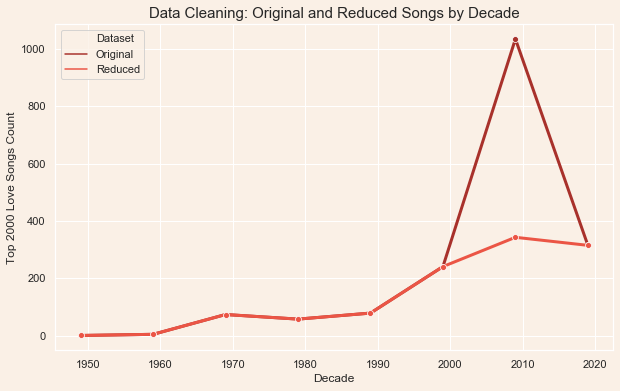

In [95]:
#Plot using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=decade_df['Decade'], y=decade_df['Top 2000 Love Songs Count'], hue=decade_df['Dataset'], \
                  palette='Reds_d', linewidth=3.0, marker='o', ax=ax)
ax.set_title("Data Cleaning: Original and Reduced Songs by Decade", fontsize=15)

plt.savefig("Results/Plots/songs_count_line.png")

# 2.1 Lyrics Cleanup
* Moludes needed: Natural Language Toolkit (NLTK) 
* NLTK is a Python package for natural language processing
* for info: https://www.nltk.org/data.html

In [96]:
# #Natural Language Toolkit (NLTK) is a Python package for natural language processing
# #Install nltk module (for info: https://www.nltk.org/data.html) *takes a while to download*
# !pip install nltk

In [97]:
#Dependencies 

# for nlkt (remove stop words)    ---> all available datasets/models:CORPORA: http://www.nltk.org/nltk_data/
from nltk.corpus import stopwords  #if stopwords corpus is not already downloaded: import nltk, nltk.download("stopwords") 

# for punctuation, import string library function  
import string 

#for stats
import scipy.stats as stats

In [100]:
#Open file with songs from top populated eras
song_with_lyrics_df=pd.read_csv("Results/csv/final_data.csv")

# #Drop weird column created for don't know what reason
song_list_df=song_with_lyrics_df.drop("Unnamed: 0", axis=1)

song_list_df.head()

,Rank,Song Name,Artist,Album,Lyrics,Year,bins
0,2,The Scientist,Coldplay,A Rush of Blood to the Head,"[Verse 1]\nCome up to meet you, tell you I'm s...",2002,2000s
1,3,Yellow,Coldplay,Parachutes,[Verse 1: Chris Martin]\nLook at the stars\nLo...,2000,2000s
2,4,Fix You,Coldplay,X&Y,[Verse 1: Chris Martin]\nWhen you try your bes...,2005,2000s
3,5,Chasing Cars,Snow Patrol,Eyes Open,[Verse 1]\nWe'll do it all\nEverything\nOn our...,2006,2000s
4,7,I'm Yours,Jason Mraz,I'm Yours,"[Verse 1]\nWell, you done done me, and you bet...",2008,2000s


In [101]:
#Check for duplicates in the list of songs
duplicates=song_list_df.duplicated(subset=["Song Name", "Artist"], keep=False)
song_list_df[duplicates]

,Rank,Song Name,Artist,Album,Lyrics,Year,bins


### Cleaning lyrics
* stop words (a, about, above, after, again, against, all....) (for info: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)
* punctuation characters (. ; : [] ? ...)
* words related to song structure (intro, chorus, verse)
* numbers
#### Create lists for:
* word count for each song
* unique words for each song
* unique words count for each song

In [147]:
#Clean lyrics and save a csv file for each song (it'd be easier to check lyrics if downstream errors occur )

#punctuation
punctuation=list(string.punctuation)

#stop words 
stop_words= set(stopwords.words('english')) 

#possible verse number (as strings)
numbers=[str(n) for n in range(100)]

#possible song structure terms and artist names
song_structure_words=["intro", "verse", "chorus", "bridge", "outro", "hook"] 

#list of total words, unique words (arrays) and unique_word_counts (series)
tot_words_list=[]            #list of total number of words per song
unique_words_list=[]         #list of unique words per song
unique_words_count_list=[]   #list of count of unique words per song


for index, row in song_list_df.iterrows():
    
    #Store song lyrics in a variable
    song_lyrics=song_list_df["Lyrics"][index]

    #Before splitting lyrics into words, remove punctation characters
    song_lyrics_clean= song_lyrics

    for x in punctuation:
        if not x == "'":
            song_lyrics_clean=song_lyrics_clean.replace(x,"")

    #Split string into list of words
    words_list= song_lyrics_clean.split() 

    #Make df of lowercase words (stop words are all lowercase)
    words_list_lower=[words_list[x].lower() for x in range(len(words_list))]

    #Remove stop words such as “the”, “a”, “an”, “in” 
    filtered_1=[k for k in words_list_lower if not k in stop_words]
    
    #remove possible verse number (as strings)
    filtered_2=[k for k in filtered_1 if not k in numbers] 

    #remove song structure words     
    filtered_lyrics_index=[k for k in filtered_2 if not k in song_structure_words] 
    
    #Create a df for lyrics analysis
    lyrics_index_df=pd.DataFrame()
 
    #Save song_lyrics_clean to a new dataframe
    lyrics_index_df[index]=filtered_lyrics_index
    
    #Append Number of words to word count list
    tot_words=len(lyrics_index_df[index])
    tot_words_list.append(tot_words)
    
    #Append Unique words to list
    unique_words=lyrics_index_df[index].unique()
    unique_words_list.append(unique_words)
    
    #Append Count of Unique words to list
    unique_words_count=lyrics_index_df[index].value_counts()
    unique_words_count_list.append(unique_words_count)    
    
    
    #Rename column and export to csv as lyrics_index.csv
    column_name= f'{song_list_df["Song Name"][index]}_{song_list_df["Artist"][index]}'
    lyrics_index_df=lyrics_index_df.rename(columns={index: column_name})
    lyrics_index_df.to_csv(f'Results/Lyrics/lyrics_{index}_df.csv')

#Display example of cleaned lyrics dataframe
lyrics_index_df

,You Wanted More_Tonic
0,love
1,tragic
2,love
3,bold
4,always
...,...
73,could
74,handle
75,life
76,can't


In [148]:
#list of word count for each song
tot_words_list

[101,
 99,
 93,
 83,
 227,
 110,
 166,
 144,
 123,
 76,
 125,
 134,
 408,
 150,
 119,
 231,
 86,
 152,
 49,
 80,
 152,
 110,
 125,
 100,
 61,
 87,
 215,
 240,
 73,
 122,
 168,
 43,
 65,
 72,
 48,
 214,
 154,
 168,
 109,
 91,
 116,
 103,
 91,
 202,
 52,
 87,
 104,
 70,
 53,
 130,
 87,
 156,
 150,
 134,
 146,
 105,
 181,
 353,
 146,
 193,
 83,
 95,
 255,
 99,
 151,
 256,
 179,
 95,
 142,
 136,
 163,
 110,
 84,
 86,
 118,
 232,
 99,
 281,
 111,
 41,
 300,
 267,
 269,
 200,
 141,
 102,
 126,
 72,
 74,
 138,
 60,
 100,
 108,
 97,
 130,
 118,
 75,
 141,
 168,
 143,
 101,
 61,
 129,
 394,
 102,
 57,
 103,
 99,
 110,
 441,
 158,
 129,
 96,
 93,
 60,
 82,
 385,
 106,
 86,
 144,
 126,
 118,
 63,
 139,
 102,
 129,
 170,
 76,
 250,
 82,
 112,
 120,
 171,
 101,
 314,
 43,
 129,
 133,
 183,
 130,
 162,
 159,
 65,
 82,
 129,
 80,
 235,
 207,
 184,
 94,
 123,
 132,
 75,
 250,
 28,
 118,
 117,
 184,
 111,
 142,
 88,
 136,
 106,
 77,
 180,
 59,
 97,
 160,
 92,
 157,
 129,
 101,
 125,
 161,
 101,
 139,
 

In [149]:
#list of unique words for each song
unique_words_list

[array(['come', 'meet', 'tell', "i'm", 'sorry', 'know', 'lovely', 'find',
        'need', 'set', 'apart', 'secrets', 'ask', 'questions', 'oh',
        "let's", 'go', 'back', 'start', 'running', 'circles', 'coming',
        'tails', 'heads', 'science', 'nobody', 'said', 'easy', 'shame',
        'us', 'part', 'one', 'ever', 'would', 'hard', 'take', 'guessing',
        'numbers', 'figures', 'pulling', 'puzzles', 'progress', 'speak',
        'loud', 'heart', 'love', 'haunt', 'rush', 'chasing', 'going',
        'ohooh', 'oohoohoohooh', 'aahooh'], dtype=object),
 array(['chris', 'martin', 'look', 'stars', 'shine', 'everything', 'yeah',
        'yellow', 'came', 'along', 'wrote', 'song', 'things', 'called',
        'took', 'turn', 'oh', 'thing', 'done', 'jonny', 'aah', 'skin',
        'bones', 'ooh', 'something', 'beautiful', 'know', 'love', 'swam',
        'across', 'jumped', "'cause", 'drew', 'line', "i'd", 'bleed',
        'dry', 'true'], dtype=object),
 array(['chris', 'martin', 'try', 'b

In [150]:
#list of unique words counts for each song
unique_words_count_list

[said            6
 back            5
 tell            5
 start           4
 oohoohoohooh    4
 nobody          4
 oh              4
 easy            4
 ohooh           3
 science         3
 apart           3
 running         2
 ever            2
 us              2
 shame           2
 come            2
 hard            2
 part            2
 questions       2
 would           2
 circles         2
 coming          2
 tails           2
 i'm             2
 one             2
 love            1
 figures         1
 progress        1
 going           1
 pulling         1
 haunt           1
 sorry           1
 speak           1
 numbers         1
 meet            1
 loud            1
 heart           1
 take            1
 need            1
 ask             1
 puzzles         1
 set             1
 lovely          1
 guessing        1
 know            1
 rush            1
 secrets         1
 go              1
 let's           1
 chasing         1
 find            1
 aahooh          1
 heads      

## 2.2 ANALYSIS: Word count per decade

In [151]:
#Create a new df with year, bin category and word count list
words_count_df=pd.DataFrame({
    "Song Name": song_list_df["Song Name"],
    "Artist": song_list_df["Artist"],
    "Words count": tot_words_list,
    "Year": song_list_df["Year"],
    "Bin": song_list_df["bins"]
})

words_count_df

,Song Name,Artist,Words count,Year,Bin
0,The Scientist,Coldplay,101,2002,2000s
1,Yellow,Coldplay,99,2000,2000s
2,Fix You,Coldplay,93,2005,2000s
3,Chasing Cars,Snow Patrol,83,2006,2000s
4,I'm Yours,Jason Mraz,227,2008,2000s
...,...,...,...,...,...
1106,Hard to Say I'm Sorry,Chicago,96,1983,80s
1107,Haunted,Taylor Swift,172,2010,2010s
1108,Breakthrough,Modest Mouse,118,1996,90s
1109,Saturday Night,Misfits,124,1999,90s


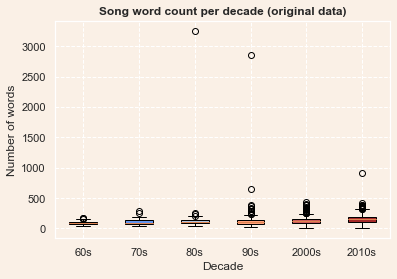

In [152]:
# #PLOT USING MATPLOTLIB

#Create separate subsets per bin
words_2010s=words_count_df.loc[words_count_df["Bin"] == "2010s"]["Words count"]
words_2000s=words_count_df.loc[words_count_df["Bin"] == "2000s"]["Words count"]
words_90s=words_count_df.loc[words_count_df["Bin"] == "90s"]["Words count"]
words_80s=words_count_df.loc[words_count_df["Bin"] == "80s"]["Words count"]
words_70s=words_count_df.loc[words_count_df["Bin"] == "70s"]["Words count"]
words_60s=words_count_df.loc[words_count_df["Bin"] == "60s"]["Words count"]

#plot
fig= plt.plot(figsize=(20,10))
labels=["60s", "70s", "80s", "90s", "2000s", "2010s"]
data=[words_60s, words_70s,words_80s, words_90s, words_2000s, words_2010s]

# rectangular box plot
bplot = plt.boxplot(data,patch_artist=True,  # fill with color,
                    labels=labels)  # will be used to label x-ticks

plt.title("Song word count per decade (original data)", fontsize=12, fontweight="bold")
plt.xlabel("Decade")
plt.ylabel("Number of words")
plt.grid(linestyle='--', linewidth=1)


# fill with colors
#Note: bplot is a dict, these are the keys: ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']
colors=["mediumblue", "cornflowerblue","lightsteelblue", "lightsalmon","indianred", "brown"]


for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)


plt.savefig("Results/Plots/word_count_boxplot_original_matplotlib.png")

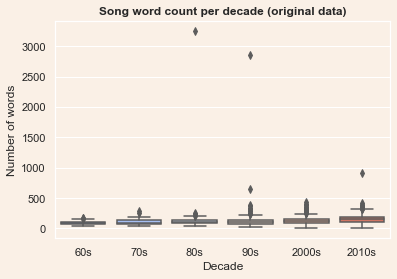

In [153]:
#PLOT USING SEABORN
order=["60s", "70s", "80s", "90s", "2000s", "2010s"]

# Use a color palette
fig=sns.boxplot( x=words_count_df["Bin"], y=words_count_df["Words count"], order=order,palette="coolwarm")
fig.set(xlabel='Decade', ylabel='Number of words')
fig.set_title("Song word count per decade (original data)", fontsize=12, fontweight="bold")
plt.savefig("Results/Plots/word_count_boxplot_original_seaborn.png")

### Check outliers

In [154]:
#Identify outliers from words_count_df with number of words >3000
outliers=words_count_df.loc[words_count_df["Words count"] > 2000]
outliers

,Song Name,Artist,Words count,Year,Bin
754,Everybody's Gotta Learn Sometimes,Beck,2851,1999,90s
1023,shhh.. Just listEn :),A Rocket to the Moon,3258,1988,80s


In [155]:
#Retrieve info for outliers in song_list_df
outliers_df=song_list_df.loc[(song_list_df.index == 754) | (song_list_df.index == 1023)]
outliers_df

,Rank,Song Name,Artist,Album,Lyrics,Year,bins,Clean Lyrics
754,993,Everybody's Gotta Learn Sometimes,Beck,Cinematic Treatment,[Verse 1]\nSometimes you can fix something by ...,1999,90s,"[sometimes, you, fix, something, prick, winnin..."
1023,774,shhh.. Just listEn :),A Rocket to the Moon,NaN,"FADE IN:\n\nEXT. WINTER RIVER, CONNECTICUT - D...",1988,80s,"[fade, ext, winter, river, connecticut, day, c..."


In [156]:
#A Rocket to the Moon - shhh.. Just listEn :)
outliers_df["Lyrics"][1023]

#Comment: A lot info in the lyrics, like " CAMERA EXPLORES, ATTIC - NEW ANGLE - DAY" CAMERA TILTS UP FROM THE WINDOW\
#-----> DROP!

'FADE IN:\n\nEXT. WINTER RIVER, CONNECTICUT - DAY\n\nA crisp and perfect New England town.  Almost too neat\nto be real.  No visible townspeople.  CAMERA EXPLORES\ntown.\n\n\nCAMERA FLIES\n\nover a rickety bridge -- PAST the Maitland Hardware and\nAppliance store -- PAST the church -- the Historical\nSociety -- UP over the graveyard on the hill and\nfinally --\n\nTo the Maitland house.  The perfect Victorian house\nsurveying the tiny village.  Suddenly --\n\n\nA GIANT DADDY LONGLEGS SPIDER\n\nmounts the crest of the hill beside the house, pauses to\nwave a spindly leg and then creeps menacingly on top of\nthe Maitland house.\n\nADAM (O.S..)\nWell, well, you\'re a big fella...!\n\nA hand -- as big as God\'s -- with a huge tweezer,\ngently reaches down out of the sky and lies, palm up,\nin the yard next to the house.  Daddy Longlegs climbs\ninto it.  The hand rises into the sky again.\n\n\nINT. ATTIC - NEW ANGLE - DAY\n\nReveals Winter River as a miniature town, while The\nDaddy Longlegs

In [157]:
#Beck - Everybody's Gotta Learn Sometimes
outliers_df["Lyrics"][754]

#Comment: the song does exist but the lyrics belong to another song (Genius problem) (The Devil Glitch by Chris Butler\
#also known as the longest song ever! Full version is 1h long. https://www.youtube.com/watch?v=10SnNfxjAI8)  -----> DROP!

'[Verse 1]\nSometimes you can fix something by just being a prick\nWinning by intimidation\n\n[Verse 2]\nSometimes you can fix something by just lifting your skirt\nIt\'s the ultimate distraction\n\n[Verse 3]\nI poke button\nI want action\nLet\'s hear some gears and see some smoke\nNo dilly-dally\nMove your heinie\nThis is the age of "go for broke"\n\n[Screw It, There Are 500 Verses, I Don\'t Have Time For This]\nSometimes you can fix something by just kissing some ass\nIf you don\'t mind humiliation\nSometimes you can fix something by just smoking a pipe\nAcademic contemplation\n\n\n\nSo pathetic\n\nNo mechanic\n\nNo steady eye, no magic touch\n\nNo screwdriver\n\nBall-peen hammer\n\nAnd Mr. Fix-it\'s gone to lunch\n\n\n\nNot personal?\n\nYeah it\'s personal\n\nWhat did I ever do to you?\n\nNo crap from\n\nContraptions\n\nJust do what I tell you to do\n\n\n\nSometimes you can fix something by just blaming your mom\n\nEverybody loves a victim\n\nSometimes you can fix something by just 

In [159]:
#Drop outliers
words_count_clean_df=words_count_df.drop([754, 1023])
words_count_clean_df

,Song Name,Artist,Words count,Year,Bin
0,The Scientist,Coldplay,101,2002,2000s
1,Yellow,Coldplay,99,2000,2000s
2,Fix You,Coldplay,93,2005,2000s
3,Chasing Cars,Snow Patrol,83,2006,2000s
4,I'm Yours,Jason Mraz,227,2008,2000s
...,...,...,...,...,...
1106,Hard to Say I'm Sorry,Chicago,96,1983,80s
1107,Haunted,Taylor Swift,172,2010,2010s
1108,Breakthrough,Modest Mouse,118,1996,90s
1109,Saturday Night,Misfits,124,1999,90s


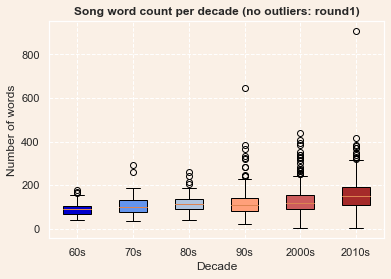

In [160]:
#PLOT USING MATPLOTLIB

#Create separate subsets per bin
words_2010s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "2010s"]["Words count"]
words_2000s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "2000s"]["Words count"]
words_90s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "90s"]["Words count"]
words_80s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "80s"]["Words count"]
words_70s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "70s"]["Words count"]
words_60s=words_count_clean_df.loc[words_count_clean_df["Bin"] == "60s"]["Words count"]

#plot
fig= plt.plot(figsize=(20,10))
labels=["60s", "70s", "80s", "90s", "2000s", "2010s"]
data=[words_60s, words_70s,words_80s, words_90s, words_2000s, words_2010s]

# rectangular box plot
bplot = plt.boxplot(data,patch_artist=True,  # fill with color,
                    labels=labels)  # will be used to label x-ticks

plt.title("Song word count per decade (no outliers: round1)", fontsize=12, fontweight="bold")
plt.xlabel("Decade")
plt.ylabel("Number of words")
plt.grid(linestyle='--', linewidth=1)


# fill with colors
#Note: bplot is a dict, these are the keys: ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']
colors=["mediumblue", "cornflowerblue","lightsteelblue", "lightsalmon","indianred", "brown"]


for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)


plt.savefig("Results/Plots/word_count_boxplot_no_outliers_round1_matplotlib.png")

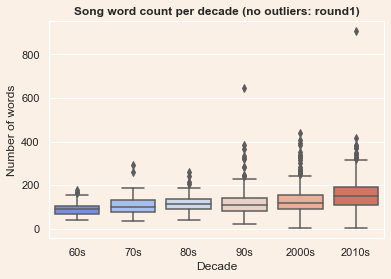

In [161]:
#PLOT USING SEABORN
order=["60s", "70s", "80s", "90s", "2000s", "2010s"]

# Use a color palette
fig=sns.boxplot( x=words_count_clean_df["Bin"], y=words_count_clean_df["Words count"], order=order,palette="coolwarm")
fig.set(xlabel='Decade', ylabel='Number of words')
fig.set_title("Song word count per decade (no outliers: round1)", fontsize=12, fontweight="bold")
plt.savefig("Results/Plots/word_count_boxplot_no_outliers_round1_seaborn.png")

### Check outliers: round 2
* there are two other strong outliers that we couldn't see in the first graph

In [162]:
#Identify outliers from words_count_df with number of words >600
outliers_2=words_count_clean_df.loc[words_count_clean_df["Words count"] > 600] 
outliers_2

,Song Name,Artist,Words count,Year,Bin
552,"Love Me Like You Do - From ""Fifty Shades of Grey""",Ellie Goulding,909,2015,2010s
991,Brown Skin Lady,Black Star,648,1998,90s


In [163]:
#Retrieve info for outliers in song_list_df
outliers_2_df=song_list_df.loc[(song_list_df.index == 552) | (song_list_df.index == 991)]
outliers_2_df

,Rank,Song Name,Artist,Album,Lyrics,Year,bins,Clean Lyrics
552,523,"Love Me Like You Do - From ""Fifty Shades of Grey""",Ellie Goulding,"Love Me Like You Do (From ""Fifty Shades of Grey"")",Song of the Year\nKendrick Lamar - Alright\nTa...,2015,2010s,"[song, year, kendrick, lamar, alright, taylor,..."
991,704,Brown Skin Lady,Black Star,Mos Def & Talib Kweli Are Black Star,[Sample: Chameleon Street]\nSmooth: You got th...,1998,90s,"[sample, chameleon, street, smooth, you, got, ..."


In [164]:
#Ellie Goulding - Love Me Like You Do - From "Fifty Shades of Grey"
outliers_2_df["Lyrics"][552]

#Comment: lyrics match from Genius is list of 2016 Grammys Nominees (https://genius.com/Grammys-2016-nominees-lyrics)
# ----> DROP

'Song of the Year\nKendrick Lamar - Alright\nTaylor Swift - Blank Space\nLittle Big Town - Girl Crush\nWiz Khalifa - See You Again ft. Charlie Puth\nEd Sheeran - Thinking Out Loud - WINNER\nRecord of the Year\nD\'Angelo & The Vanguard - Really Love\nMark Ronson - Uptown Funk ft. Bruno Mars - WINNER\nEd Sheeran - Thinking Out Loud\nTaylor Swift - Blank Space\nThe Weeknd - Can\'t Feel My Face\nAlbum of the Year\nAlabama Shakes - Sound & Color\nKendrick Lamar - To Pimp A Butterfly\nChris Stapleton - Traveller\nTaylor Swift - 1989 - WINNER\nThe Weeknd - Beauty Behind The Madness\nBest New Artist\nCourtney Barnett\nJames Bay\nSam Hunt\nTori Kelly\nMeghan Trainor - WINNER\nBest Rap Performance:\nJ. Cole - "Apparently"\nDrake - "Back to Back"\nFetty Wap - "Trap Queen"\nKendrick Lamar - "Alright" - WINNER\nNicki Minaj - "Truffle Butter" ft. Drake & Lil\' Wayne\nKanye West - "All Day" ft. Theophilus London\nBest Rap/Sung Collaboration:\nBig Sean - "One Man Can Change the World" ft. Kanye West &

In [165]:
#Black Star - Brown Skin Lady"
outliers_2_df["Lyrics"][991]

#Comment: Song really has long lyrics, both members of the band (Talib Kweli and Mos Def) sing at the same time 
#(https://genius.com/Black-star-brown-skin-lady-lyrics)  ----> Could keep but it's indeed an outlier

'[Sample: Chameleon Street]\nSmooth: You got that good hair too\nWilliam Douglas Street: You like what?\nSmooth: I like girls with that light complexion on them\nStreet: You\'re a moron\nSmooth: I can\'t help it\nStreet: What? Being a moron\nSmooth: Yeah that too\nStreet: You\'re the first one out there with a dashiki talking that crap\nSmooth: I\'m a victim -\nStreet: "Good hair." Nigga you so brainwashed\nSmooth: I\'m a victim brother\nStreet: You\'re a \'victim\'\nSmooth: I\'m a victim of 400 years of conditioning\nStreet: Shut up\nSmooth: The Man has programmed my conditioning\nStreet: Mhm\nSmooth: Even my conditioning has been conditioned\n\n[Intro: Talib Kweli & Mos Def]\nBut most of yall brothers\nCame from your mothers\nLooking all sweet (Black Star keep shining)\nAnd be like yo, let me ask you somethin\nI wanna know, I wanna know who you are\n\n[Chorus: Mos Def & Talib Kweli]\nBrown skin lady, hey hey\nYes\nWhere you goin\'\nThis goes to the brown skin ladies yo\nBrown skin la

In [168]:
#Drop outliers and save df
words_count_clean_2_df=words_count_clean_df.drop([552, 991])

words_count_clean_2_df.to_csv("Results/csv/song_list_no_outliers.csv")
words_count_clean_2_df

,Song Name,Artist,Words count,Year,Bin
0,The Scientist,Coldplay,101,2002,2000s
1,Yellow,Coldplay,99,2000,2000s
2,Fix You,Coldplay,93,2005,2000s
3,Chasing Cars,Snow Patrol,83,2006,2000s
4,I'm Yours,Jason Mraz,227,2008,2000s
...,...,...,...,...,...
1106,Hard to Say I'm Sorry,Chicago,96,1983,80s
1107,Haunted,Taylor Swift,172,2010,2010s
1108,Breakthrough,Modest Mouse,118,1996,90s
1109,Saturday Night,Misfits,124,1999,90s


In [167]:
#Statistical analysis OneWay ANOVA

#create separate subsets per bin
words_2010s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "2010s"]["Words count"]
words_2000s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "2000s"]["Words count"]
words_90s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "90s"]["Words count"]
words_80s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "80s"]["Words count"]
words_70s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "70s"]["Words count"]
words_60s=words_count_clean_2_df.loc[words_count_clean_2_df["Bin"] == "60s"]["Words count"]

#run OneWay ANOVA
(statistic, pvalue)=stats.f_oneway(words_2010s, words_2000s, words_90s, words_80s, words_70s, words_60s)
print(f'The OneWay ANOVA pvalue is: {pvalue}')

The OneWay ANOVA pvalue is: 8.395836195399574e-22


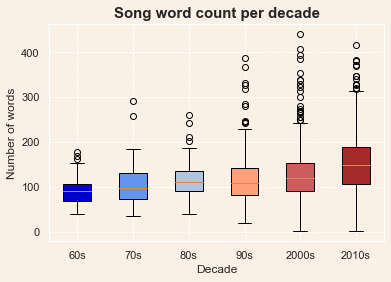

In [169]:
#PLOT USING MATPLOTLIB
fig= plt.plot(figsize=(20,10))
labels=["60s", "70s", "80s", "90s", "2000s", "2010s"]
data=[words_60s, words_70s,words_80s, words_90s, words_2000s, words_2010s]

# rectangular box plot
bplot = plt.boxplot(data,patch_artist=True,  # fill with color,
                    labels=labels)  # will be used to label x-ticks

plt.title("Song word count per decade", fontsize=15, fontweight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.grid(linestyle='--', linewidth=1)

# fill with colors
#Note: bplot is a dict, these are the keys: ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']
colors=["mediumblue", "cornflowerblue","lightsteelblue", "lightsalmon","indianred", "brown"]


for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)

plt.savefig("Results/Plots/word_count_boxplot_final_matplotlib.png")

The OneWay ANOVA pvalue is: 8.395836195399574e-22


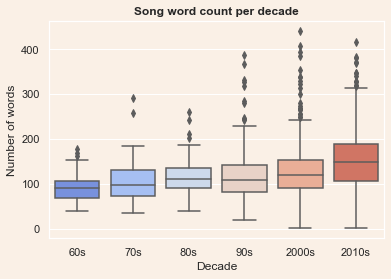

In [170]:
#PLOT USING SEABORN

order=["60s", "70s", "80s", "90s", "2000s", "2010s"]

# Use a color palette
fig=sns.boxplot( x=words_count_clean_2_df["Bin"], y=words_count_clean_2_df["Words count"], order=order,palette="coolwarm")
fig.set(xlabel='Decade', ylabel='Number of words')
fig.set_title("Song word count per decade", fontsize=12, fontweight="bold")
plt.savefig("Results/Plots/word_count_boxplot_final_seaborn.png")
print(f'The OneWay ANOVA pvalue is: {pvalue}')

### Question: is there a correlation between number of words and number of songs in a decade?

The correlation coefficient is: 0.7951070778159567


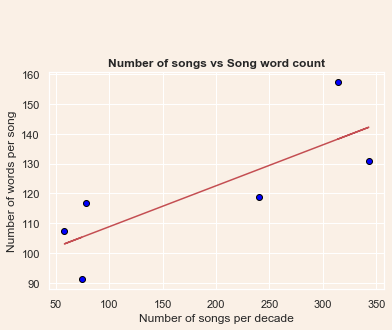

In [171]:
#Scatter Plot
x_values=[len(words_60s), len(words_70s),len(words_80s), len(words_90s), len(words_2000s), len(words_2010s)]
y_values=[words_60s.mean(), words_70s.mean(),words_80s.mean(), words_90s.mean(), words_2000s.mean(), words_2010s.mean()]

plt.scatter(x_values, y_values, marker= "o", c="blue", edgecolors= "black")
plt.title("Number of songs vs Song word count", fontsize=12, fontweight="bold")
plt.xlabel("Number of songs per decade")
plt.ylabel("Number of words per song")



#linear regression
(slope, intercept, rvalue, pvalue, stdev)= stats.linregress(x_values, y_values)
print(f'The correlation coefficient is: {rvalue}')


x_series=pd.Series(x_values)
regress_values= x_series*slope + intercept
line_eq= f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (100,180), fontsize=12, color= "red")

plt.savefig("Results/Plots/correlation_songwords_songnumber")

## ANALYSIS: Common words

In [174]:
#Dependencies
import collections

In [175]:
#Retrieve list of unique words for each song and replace the lyrics column with it
unique_words_list
song_list_df['Clean Lyrics'] = unique_words_list

unique_words_df = song_list_df.drop("Lyrics", axis=1)

unique_words_df.head()

,Rank,Song Name,Artist,Album,Year,bins,Clean Lyrics
0,2,The Scientist,Coldplay,A Rush of Blood to the Head,2002,2000s,"[come, meet, tell, i'm, sorry, know, lovely, f..."
1,3,Yellow,Coldplay,Parachutes,2000,2000s,"[chris, martin, look, stars, shine, everything..."
2,4,Fix You,Coldplay,X&Y,2005,2000s,"[chris, martin, try, best, succeed, get, want,..."
3,5,Chasing Cars,Snow Patrol,Eyes Open,2006,2000s,"[we'll, everything, need, anything, anyone, la..."
4,7,I'm Yours,Jason Mraz,I'm Yours,2008,2000s,"[well, done, bet, felt, tried, chill, hot, mel..."


In [176]:
# sort dataframe with lyrics into songs from 2010s
df_10 = unique_words_df.loc[unique_words_df["bins"] == "2010s"]

# export csv of lyrics from the 2010s
df_10_lyrics = df_10['Clean Lyrics']
df_10_lyrics.to_csv("Results/csv/2010s_lyrics.csv")

In [177]:
# sort dataframe with lyrics into songs from 2000s
df_00 = unique_words_df.loc[unique_words_df["bins"] == "2000s"]

# export csv of lyrics from the 2000s
df_00_lyrics = df_00['Clean Lyrics']
df_00_lyrics.to_csv("Results/csv/2000s_lyrics.csv")

In [178]:
# sort dataframe with lyrics into songs from 90s
df_90 = unique_words_df.loc[unique_words_df["bins"] == "90s"]

# export csv of lyrics from the 60s
df_90_lyrics = df_90['Clean Lyrics']
df_90_lyrics.to_csv("Results/csv/90s_lyrics.csv")

In [179]:
# sort dataframe with lyrics into songs from 80s
df_80 = unique_words_df.loc[unique_words_df["bins"] == "80s"]

# export csv of lyrics from the 80s
df_80_lyrics = df_80['Clean Lyrics']
df_80_lyrics.to_csv("Results/csv/80s_lyrics.csv")

In [180]:
# sort dataframe with lyrics into songs from 70s
df_70 = unique_words_df.loc[unique_words_df["bins"] == "70s"]

# export csv of lyrics from the 70s
df_70_lyrics = df_70['Clean Lyrics']
df_70_lyrics.to_csv("Results/csv/70s_lyrics.csv")

In [181]:
# sort dataframe with lyrics into songs from 60s
df_60 = unique_words_df.loc[unique_words_df["bins"] == "60s"]

# export csv of lyrics from the 60s
df_60_lyrics = df_60['Clean Lyrics']
df_60_lyrics.to_csv("Results/csv/60s_lyrics.csv")

df_60.head()

,Rank,Song Name,Artist,Album,Year,bins,Clean Lyrics
356,42,All You Need Is Love,The Beatles,Magical Mystery Tour,1967,60s,"[love, there's, nothing, can't, done, sing, su..."
359,47,Something,The Beatles,Abbey Road,1969,60s,"[something, way, moves, attracts, like, lover,..."
367,78,Love Me Do,The Beatles,Please Please Me,1962,60s,"[paul, mccartney, john, lennon, love, know, i'..."
368,79,Wouldn't It Be Nice,The Beach Boys,Stack-O-Tracks,1966,60s,"[nice, older, wait, long, live, together, kind..."
369,80,I Want to Hold Your Hand,The Beatles,1,1963,60s,"[paul, mccartney, john, lennon, oh, yeah, i'll..."


#### 60s

'love' :  56
'know' :  37
'see' :  27
'oh' :  26
'like' :  25
'say' :  24
'want' :  24
'day' :  21
'never' :  21
""can't"" :  20
'go' :  20
'heart' :  20
'time' :  19
'got' :  19
'one' :  17
'way' :  17
'long' :  17
'need' :  16
'could' :  16
'make' :  15


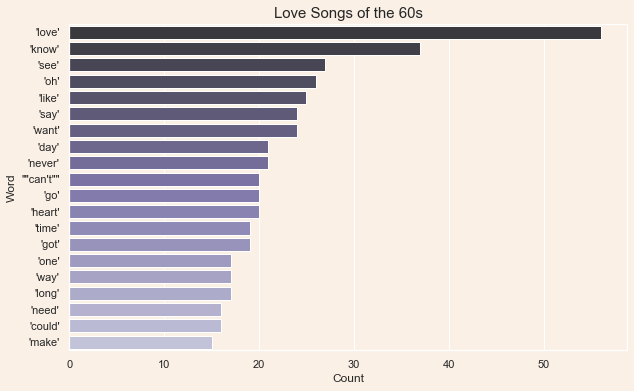

In [188]:
# read csv
file = open('Results/csv/60s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas:
    # words_df.plot.barh(x='Word', y='Count')
    # plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='Purples_d', ax=ax)
ax.set_title("Love Songs of the 60s", fontsize=15)
plt.savefig("Results/Plots/60s_common_words.png")

#### 70s

'love' :  40
'know' :  27
'like' :  22
'time' :  20
'oh' :  19
'see' :  19
'life' :  18
'way' :  17
'heart' :  16
'eyes' :  15
'feel' :  15
""that's"" :  15
'never' :  15
'could' :  14
'go' :  14
'come' :  14
'make' :  14
'got' :  13
'want' :  13
""can't"" :  12


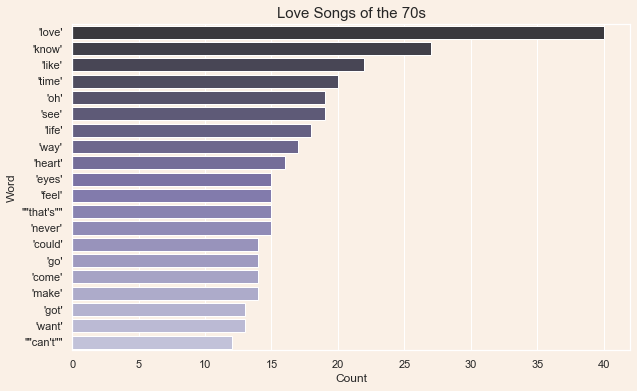

In [189]:
# read csv
file = open('Results/csv/70s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas:
    # words_df.plot.barh(x='Word', y='Count')
    # plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='Purples_d', ax=ax)
ax.set_title("Love Songs of the 70s", fontsize=15)
plt.savefig("Results/Plots/70s_common_words.png")

#### 80s

'love' :  47
'time' :  39
'know' :  36
'see' :  32
'away' :  30
""can't"" :  30
'go' :  30
'make' :  29
'feel' :  29
'heart' :  28
'never' :  27
'say' :  26
'want' :  25
'oh' :  23
'let' :  23
'like' :  22
'got' :  21
'come' :  21
'take' :  21
'long' :  20


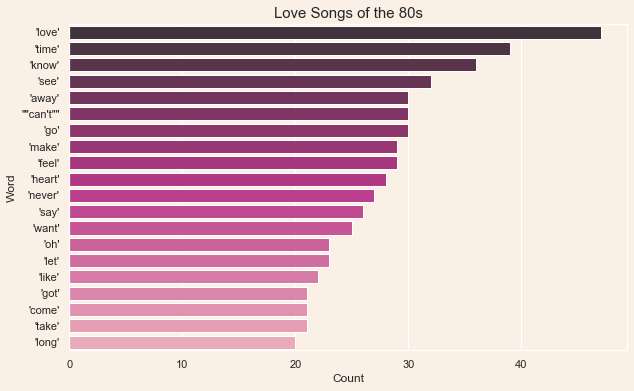

In [190]:
# read csv
file = open('Results/csv/80s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas:
    # words_df.plot.barh(x='Word', y='Count')
    # plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='RdPu_d', ax=ax)
ax.set_title("Love Songs of the 80s", fontsize=15)
plt.savefig("Results/Plots/80s_common_words.png")

#### 90s

'love' :  147
'know' :  127
'like' :  112
'never' :  91
'see' :  89
'one' :  87
'feel' :  81
'go' :  76
""can't"" :  75
'time' :  75
'could' :  73
'oh' :  72
'make' :  71
'say' :  69
'way' :  68
'want' :  66
'heart' :  66
'away' :  66
'eyes' :  63
'get' :  62


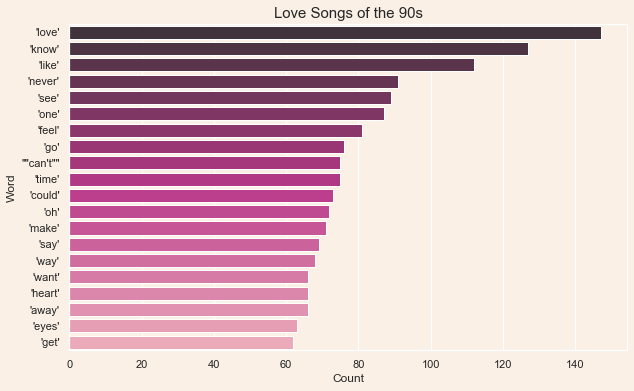

In [191]:
# read csv
file = open('Results/csv/90s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas:
    # words_df.plot.barh(x='Word', y='Count')
    # plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='RdPu_d', ax=ax)
ax.set_title("Love Songs of the 90s", fontsize=15)

plt.savefig("Results/Plots/90s_common_words.png")

#### 2000s

'know' :  183
'love' :  174
'like' :  152
'see' :  127
'time' :  121
'say' :  118
'one' :  116
'never' :  113
'make' :  111
'go' :  106
'take' :  106
'oh' :  102
'got' :  102
'get' :  90
""can't"" :  89
'heart' :  88
'back' :  85
'need' :  83
'come' :  83
'let' :  83


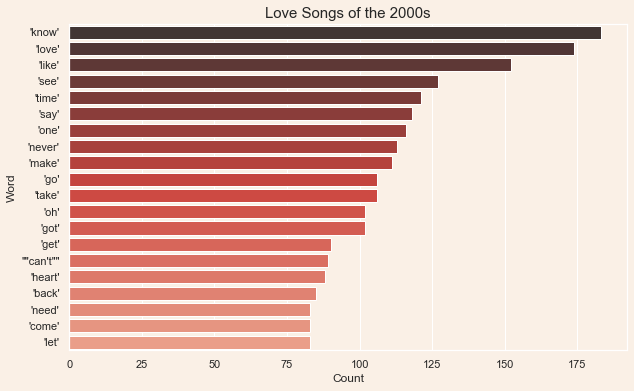

In [192]:
# read csv
file = open('Results/csv/2000s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas
# words_df.plot.barh(x='Word', y='Count')
# plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn

sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='Reds_d', ax=ax)
ax.set_title("Love Songs of the 2000s", fontsize=15)

plt.savefig("Results/Plots/2000s_common_words.png")

#### 2010s

'like' :  180
'love' :  176
'know' :  174
'time' :  125
'got' :  121
'oh' :  120
'never' :  118
'see' :  114
'go' :  106
""can't"" :  103
'say' :  101
'one' :  99
'let' :  98
'get' :  96
'feel' :  93
'take' :  93
'make' :  88
'want' :  88
'yeah' :  87
'baby' :  86


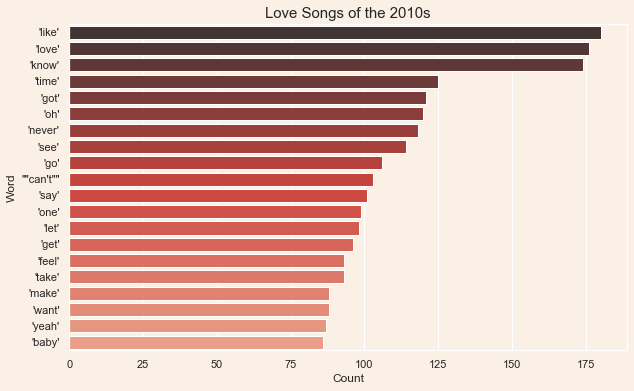

In [193]:
# read csv
file = open('Results/csv/2010s_lyrics.csv', encoding="utf8")
a= file.read()

# Create a dictionary to store word counts
wordcount = {}

# Split by punctuation to remove duplicates
for word in a.split():

    if word not in wordcount:
            wordcount[word] = 1
    
    else:
            wordcount[word] += 1
            
# Print most common word
n_print = 20

word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


lst = word_counter.most_common(n_print)

# Create a data frame of the most common words 
words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# plot an ugly horizontal bar chart using matplotlib and pandas:
    # words_df.plot.barh(x='Word', y='Count')
    # plt.gca().invert_yaxis()

# plot a much prettier horizontal bar chart using seaborn
sns.set(rc={'axes.facecolor':'linen', 'figure.facecolor':'linen'})
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=words_df['Count'], y=words_df['Word'], palette='Reds_d', ax=ax)
ax.set_title("Love Songs of the 2010s", fontsize=15)

plt.savefig("Results/Plots/2010s_common_words.png")